In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from datetime import datetime

C:\Users\Leviathan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r"C:\My Data\ML Projects\MicrosoftStock.csv")
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [4]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [6]:
df.columns

Index(['index', 'date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [8]:
df

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


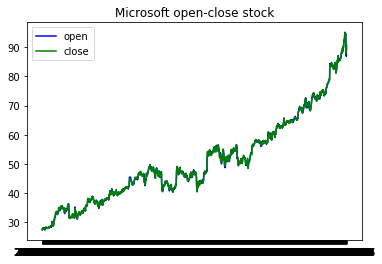

In [7]:
plt.plot(df['date'], df['open'], label='open', color='blue')
plt.plot(df['date'], df['close'], label='close', color='green')
plt.title('Microsoft open-close stock')
plt.legend()

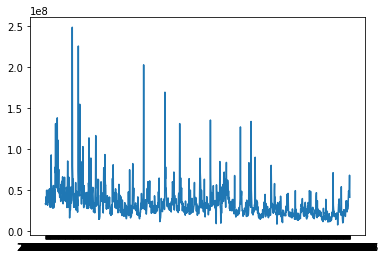

In [10]:
plt.plot(df['date'], df['volume'])

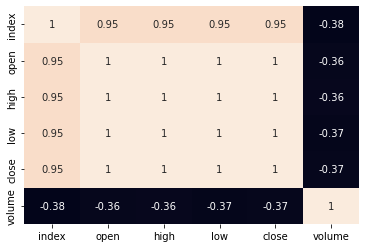

In [12]:
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

Text(0, 0.5, 'Close')

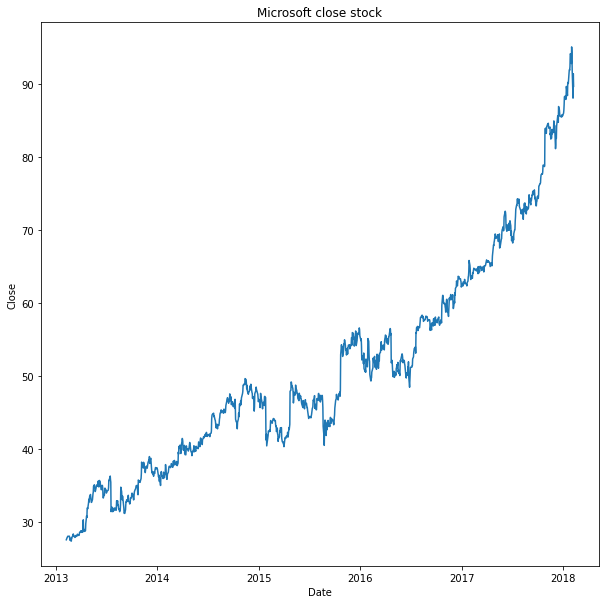

In [13]:
df['date'] = pd.to_datetime(df['date'])
prediction = df.loc[(df['date'] > datetime(2013,1,1)) & (df['date'] < datetime(2018,1,1))]
plt.figure(figsize=(10,10))
plt.plot(df['date'], df['close'])
plt.title("Microsoft close stock")
plt.xlabel("Date")
plt.ylabel("Close")


In [44]:
msft_close = df.filter(['close'])
dataset = msft_close.values
scaler = StandardScaler()
scaler_data = scaler.fit_transform(dataset)
len(dataset)

1259

In [45]:
training = int(np.ceil(len(dataset)*0.95))
train_data = scaler_data[:int(training), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [64]:
y_train.shape

(1137,)

In [46]:
X_train.shape

(1137, 60, 1)

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                           return_sequences=True,
                           input_shape = (X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [75]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam', loss='mae', metrics=RootMeanSquaredError())
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
36/36 [==============================] - 4s 26ms/step - loss: 0.1965 - root_mean_squared_error: 0.3003
Epoch 2/20
36/36 [==============================] - 1s 27ms/step - loss: 0.1032 - root_mean_squared_error: 0.1445
Epoch 3/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0968 - root_mean_squared_error: 0.1296
Epoch 4/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0931 - root_mean_squared_error: 0.1260
Epoch 5/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0877 - root_mean_squared_error: 0.1189
Epoch 6/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0805 - root_mean_squared_error: 0.1067
Epoch 7/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0887 - root_mean_squared_error: 0.1193
Epoch 8/20
36/36 [==============================] - 1s 28ms/step - loss: 0.0847 - root_mean_squared_error: 0.1134
Epoch 9/20
36/36 [==============================] - 1s 28ms/step - loss: 0.0809 - root_m

In [76]:
testing = scaler_data[training-60:,:]
x_test = []
y_test = dataset[training:, :]
for i in range(60,len(testing)):
    x_test.append(testing[i-60:i, 0])
x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 [==============================] - 1s 21ms/step


In [77]:
testing.shape, y_test.shape, len(testing)

((122, 1), (62, 1), 122)

In [78]:
pred_upscaled = scaler.inverse_transform(pred)

C:\Users\Leviathan\AppData\Local\Temp\ipykernel_6288\3338693218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred_upscaled


,index,date,open,high,low,close,volume,Name,Predictions
1197,391395,2017-11-08,84.14,84.610,83.8300,84.56,18034170,MSFT,82.192970
1198,391396,2017-11-09,84.11,84.270,82.9000,84.09,21171550,MSFT,82.292480
1199,391397,2017-11-10,83.79,84.095,83.2300,83.87,19397793,MSFT,82.216064
1200,391398,2017-11-13,83.66,83.940,83.4600,83.93,14196896,MSFT,82.051636
1201,391399,2017-11-14,83.50,84.100,82.9800,84.05,18801280,MSFT,81.944763
...,...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,90.830040
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,91.066010
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,90.414345
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,88.585060


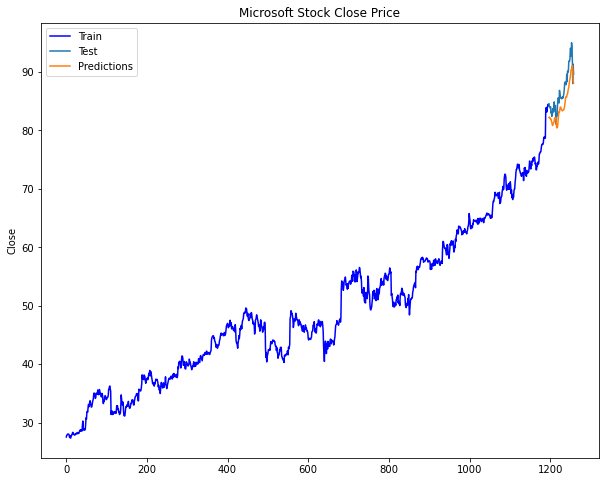

In [79]:
train = df[:training]
test = df[training:]
test['Predictions'] = pred_upscaled
test
plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
test

In [56]:
display(test['Predictions'])

1197    85.020737
1198    85.127258
1199    85.053925
1200    84.880013
1201    84.752274
          ...    
1254    94.712074
1255    94.990143
1256    94.368202
1257    92.492577
1258    91.805923
Name: Predictions, Length: 62, dtype: float32